In [1]:
#Importieren der Module
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
Max, dmax, Min, dmin=np.loadtxt('/Users/Peter/Desktop/Python-Kurs/LageMaxima.txt', skiprows=1, usecols=(0,1,2,3), unpack=True)

[  78.25286624  787.68025478] [ 0.12636014  0.46035218]


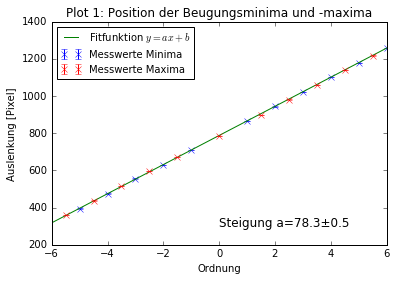

In [13]:
#definiere x-Achsen-Arrays, plotte Minimaesswerte, fitte Gerade, plotte Maximamesswerte und Gerade
Ordmin=np.array([-5,-4,-3,-2,-1,1,2,3,4,5,6])
Ordmax=np.array([-5.5,-4.5,-3.5,-2.5,-1.5,0,1.5,2.5,3.5,4.5,5.5])
plt.errorbar(Ordmin,Min, yerr=dmin, fmt='bx', linestyle='None', label=r'Messwerte Minima')
def linear(x, a, b):
    return a*x+b

popt, pcov=curve_fit(linear, Ordmin, Min)
plt.plot(np.linspace(-6,6,11), linear(np.linspace(-6,6,11), *popt), color='g', label=r'Fitfunktion $y=ax+b$')
plt.xlabel('Ordnung')
plt.ylabel('Auslenkung [Pixel]')
plt.errorbar(Ordmax,Max, yerr=dmax, fmt='rx',linestyle='None',label=r'Messwerte Maxima' )
plt.legend(loc='best',prop={'size':10})
plt.title('Plot 1: Position der Beugungsminima und -maxima')
print(popt, np.sqrt(np.diag(pcov)))
plt.text(0, 300, 'Steigung a=78.3±0.5', fontsize=12)
plt.savefig('233Plot1.png', dpi=300)

[ 3.71050953  2.45764329  1.20477706  4.95191082  2.69904458 -1.68025478
 -8.05955414 -2.31242037 -2.56528661  0.18184715 -1.07101909]


<Container object of 3 artists>

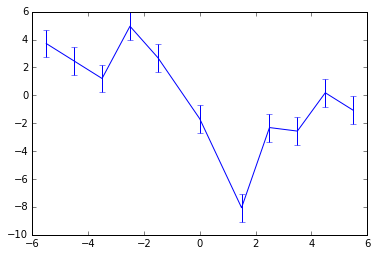

In [18]:
#Untersuche die Abweichung der Lage der Maxima von der Erwartung aus dem Fit für die Minima
Abw=Max-(linear(Ordmax, *popt))
print(Abw)
plt.errorbar(Ordmax,Abw, yerr=dmax)

In [20]:
#Berechne theoretische Vorhersage für Werte von n
ntheo=(Max-787.68025478)/78.25286624
dntheo=np.sqrt((dmax/78.25286624)**2+((Max-787.68025478)/78.25286624**2*0.46)**2)
print(ntheo, dntheo)

[-5.45258308 -4.46859357 -3.48460405 -2.43671911 -1.46550868 -0.02147212
  1.39700628  2.47044938  3.46721799  4.50232384  5.48631336] [ 0.03450591  0.0292116   0.02414316  0.01919585  0.01541169  0.01277971
  0.01519026  0.01934426  0.02405651  0.02939002  0.03469017]


<Container object of 3 artists>

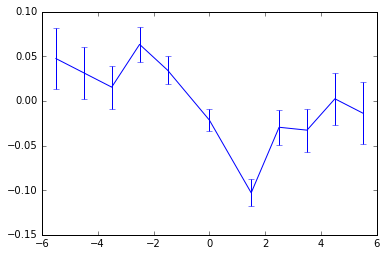

In [21]:
#Hier habe ich einfach alle möglichen Arten von Abweichungen berechnet und erratische Plots gezeichnet,
#weil die Aufgabenstellung sehr unklar ist... am Ende sind nur die Rechnungen für Abw3 wichtig
Abw2=ntheo-Ordmax
plt.errorbar(Ordmax, Abw2, yerr=dntheo)

In [23]:
print(Abw2/dntheo)
print(Abw2)

[ 1.37416778  1.07513576  0.63769408  3.29659153  2.23799787 -1.68017282
 -6.78024585 -1.52761677 -1.3627089   0.07906901 -0.39453951]
[ 0.04741692  0.03140643  0.01539595  0.06328089  0.03449132 -0.02147212
 -0.10299372 -0.02955062 -0.03278201  0.00232384 -0.01368664]


In [26]:
#Vorsicht: die Maxima liegen lt. Theorie NICHT bei 1,5, 2,5, usw. sondern hier: 
# http://www.wolframalpha.com/input/?i=local+maxima+of+(sin(pi*x)%2F(pi*x))%5E2
nsinc=np.array([-5.48,-4.45,-3.43,-2.41,-1.47,0,1.47,2.41,3.42,4.45,5.48])
Abw3=np.abs((nsinc-ntheo)/dntheo)

In [25]:
#Das sind jetzt die wirklich relevanten Abweichungen in Sigma
print(Abw3)

[ 0.79455699  0.63651326  2.26167824  1.39192106  0.29142297  1.68017282
  4.80529663  3.12492619  1.96279481  1.78032655  0.18199265]


## Teil 2: Beugungsstruktur des Doppelspalts

In [27]:
#Plot hier: http://www.physi.uni-heidelberg.de/Einrichtungen/AP/info/Fourieroptik/fourieroptik.php

In [28]:
#theoretische Werte hier: http://www.wolframalpha.com/input/?i=local+maxima+between+-1+and+1+of+(sin(pi*x)%2F(pi*x))%5E2+*cos%5E2(2.41*pi*x)
#Eigenes Verhältnis g/d in den Cosinus einsetzen nicht vergessen!!